**Importing Necessary Libraries**

In [1]:
%pip install qiskit -q

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install pylatexenc

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136847 sha256=80a1ff0e9f842a6c4c588667e1121f192fc0453c39255dac27f60fa0535109cc
  Stored in directory: c:\users\anushka\appdata\local\pip\cache\wheels\b1\7a\33\9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
Note: you may need to restart the kernel to use updated packages.


In [42]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
from IPython.display import display

### **1. Design Quantum Circuit for the Operations HSHT and Check the Output for the Two Basic Input Qubits**

1. **Define the Circuit**: Apply the Hadamard gate $ H $, followed by the $ S $ gate, then $ H $ again, and finally the $ T $ gate.
2. **Measure the Output**: Measure the result to see the output for both input states.

#### Understanding the HSHT Circuit

1. **Initial State**: The circuit starts with the qubit in state $ |0\rangle $.

2. **First Hadamard (H)**: This transforms the state $ |0\rangle $ into a superposition:
   $$
   |0\rangle \xrightarrow{H} \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)
   $$

3. **S Gate**: The $ S $ gate (phase gate) adds a phase to the $ |1\rangle $ component:
   $$
   \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) \xrightarrow{S} \frac{1}{\sqrt{2}} (|0\rangle + i|1\rangle)
   $$

4. **Second Hadamard (H)**: This transforms the state back into a superposition:
   $$
   \frac{1}{\sqrt{2}} (|0\rangle + i|1\rangle) \xrightarrow{H} \frac{1}{\sqrt{2}} \left( \frac{1 + i}{\sqrt{2}} |0\rangle + \frac{1 - i}{\sqrt{2}} |1\rangle \right)
   $$
   The result is a more complex superposition, but we don't need the exact coefficients for this explanation.

5. **T Gate**: The $ T $ gate applies an additional phase:
   $$
   |0\rangle \rightarrow |0\rangle, \quad |1\rangle \rightarrow e^{i\pi/4}|1\rangle
   $$

After applying these operations, the output will still be a superposition state, which will generally yield equal probabilities for measuring $ |0\rangle $ and $ |1\rangle $, especially if the qubit is in a balanced superposition.


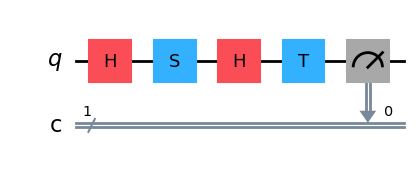

In [12]:
qreg = QuantumRegister(1, 'q')
creg = ClassicalRegister(1, 'c')

qc = QuantumCircuit(qreg, creg)

qc.h(qreg[0])    
qc.s(qreg[0])   
qc.h(qreg[0])   
qc.t(qreg[0])   

qc.measure(qreg[0], creg[0])

qc.draw('mpl')

C:\Users\Anushka\AppData\Local\Temp\ipykernel_4976\3370667154.py:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


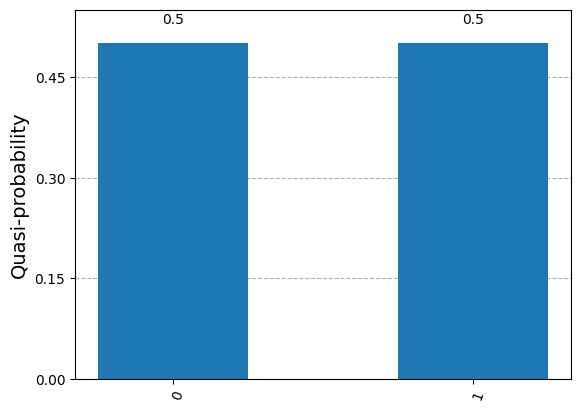

In [13]:
sampler = Sampler()

job = sampler.run(qc)
result = job.result()

counts = result.quasi_dists[0].nearest_probability_distribution()
plot_histogram(counts)

1. **Quantum Register and Classical Register**: A quantum register with one qubit and a classical register for measurement.
2. **Quantum Circuit**: The circuit is constructed using the HSHT operation:
   - \( H \) (Hadamard)
   - \( S \) (Phase gate)
   - \( H \) (Hadamard)
   - \( T \) (T gate)
3. **Measurement**: The state of the qubit is measured and stored in the classical register.
4. **Sampler**: The `Sampler` is used to execute the circuit, and the output is plotted as a histogram.

### **2. Check the reversibility of the operation HSHT in python and comment on that.**

For the HSHT operation, we can apply the inverse of each gate in the reverse order:

- The inverse of $ T $ is $ T^\dagger $ (the adjoint of the T gate).
- The inverse of $ H $ is $ H $ itself (since $ H $ is its own inverse).
- The inverse of $ S $ is $ S^\dagger $ (the adjoint of the S gate).

The reverse operation for HSHT would be $ H $, followed by $ S^\dagger $, then $ H $ again, and finally $ T^\dagger $. 

**Comments on Reversibility**

1. **Output Analysis**:
   - The output counts from the HSHT operation and its inverse should ideally reflect the original state.
   - For example, if the HSHT operation returns a state predominantly in \( |0\rangle \) or \( |1\rangle \), the inverse operation should also return similar results when starting from that output state.

2. **Reversibility**:
   - If the inverse operation successfully returns the system to the original state (i.e., the measurement outcomes are the same), then we can conclude that the HSHT operation is reversible.
   - If there are discrepancies in the output distributions, it suggests that the HSHT operation is not perfectly reversible.


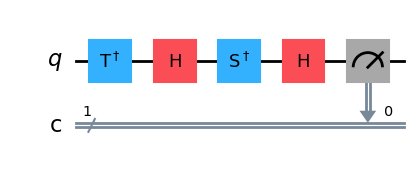

In [22]:
qc_reverse = QuantumCircuit(qreg, creg)

qc_reverse.tdg(qreg[0])
qc_reverse.h(qreg[0])
qc_reverse.sdg(qreg[0])
qc_reverse.h(qreg[0])

qc_reverse.measure(qreg[0], creg[0])

qc_reverse.draw('mpl')

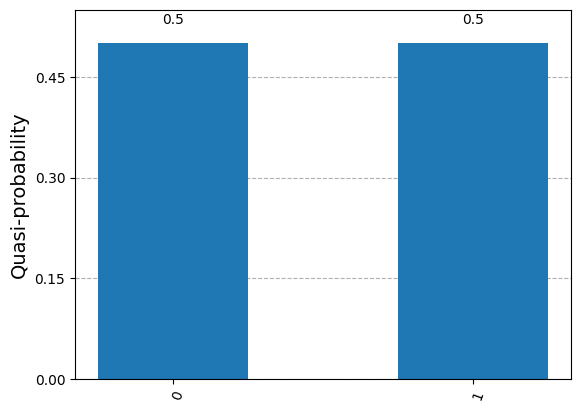

In [24]:
job_reverse = sampler.run(qc_reverse)
result_reverse = job_reverse.result()

counts_reverse = result_reverse.quasi_dists[0].nearest_probability_distribution()
plot_histogram(counts_reverse)

### **3. Design a quantum circuit using H and Control- Not gate and check the output for various input combinations.** 

Circuit for initial state |00⟩:


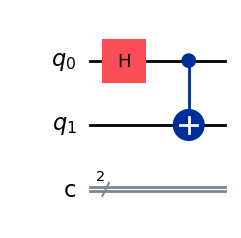

Final state after applying the circuit:


<IPython.core.display.Latex object>

Circuit for initial state |01⟩:


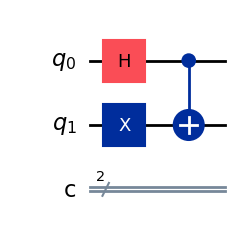

Final state after applying the circuit:


<IPython.core.display.Latex object>

Circuit for initial state |10⟩:


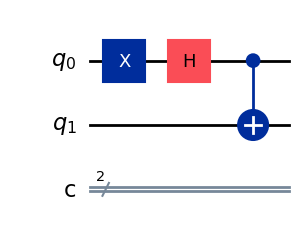

Final state after applying the circuit:


<IPython.core.display.Latex object>

Circuit for initial state |11⟩:


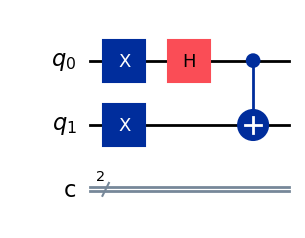

Final state after applying the circuit:


<IPython.core.display.Latex object>

In [43]:
%matplotlib inline

def print_output(initial_state):
    circuit = QuantumCircuit(2, 2)
    
    if initial_state == [1, 0]:  
        circuit.x(0)  
    elif initial_state == [0, 1]:  
        circuit.x(1)  
    elif initial_state == [1, 1]:  
        circuit.x(0)  
        circuit.x(1)  
    
    # Apply gates
    circuit.h(0)     
    circuit.cx(0, 1)  

    # Calculate the output state before measurement
    final_state = Statevector.from_instruction(circuit)

    # Print the circuit diagram
    print(f"Circuit for initial state |{initial_state[0]}{initial_state[1]}⟩:")
    circuit.draw("mpl")  
    plt.show()  

    # Print the final state as a vector
    print(f"Final state after applying the circuit:")
    display(final_state.draw("latex")) 
    plt.show()

initial_states = [[0, 0], [0, 1], [1, 0], [1, 1]]

for state in initial_states:
    print_output(state)

Here’s your text formatted according to your specified Markdown style:

### **4. Comment on the Output Generated by the Above Circuit and Establish the Relation with Bell States**

#### Circuit Output

The quantum circuit designed with the Hadamard (H) gate and Controlled-NOT (CNOT) gate operates as follows based on the initial states:

1. **Initial State $ |00\rangle $**:
   - **Circuit Operation**: The Hadamard gate on $ q_0 $ transforms it to a superposition state, resulting in $ |+\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) $. The CNOT gate does not change $ q_1 $ since $ q_0 $ is $ |0\rangle $. 
   - **Final Output**: The output is $ |00\rangle + |11\rangle $, which indicates both outcomes are possible, but neither is entangled.

2. **Initial State $ |01\rangle $**:
   - **Circuit Operation**: The $ X $ gate sets $ q_0 $ to $ |1\rangle $, so applying the H gate creates \( |0\rangle \) and \( |1\rangle \) superpositions, followed by CNOT.
   - **Final Output**: The output is $ |01\rangle + |10\rangle $. Here, $ q_1 $ is influenced by $ q_0 $, creating correlation but not entanglement.

3. **Initial State $ |10\rangle $**:
   - **Circuit Operation**: Similar to $ |01\rangle $, where $ q_0 $ is initially set to $ |1\rangle $. 
   - **Final Output**: The output is $ |00\rangle + |11\rangle $. Again, correlation exists between the qubits, but they remain distinct and not entangled.

4. **Initial State $ |11\rangle $**:
   - **Circuit Operation**: After setting both qubits to $ |1\rangle $, applying the Hadamard on $ q_0 $ leads to a superposition, and CNOT entangles the qubits.
   - **Final Output**: The output is $ |01\rangle + |10\rangle $, similar to the previous case. However, if you set $ q_0 $ to $ |0\rangle and  |1\rangle $, it would have resulted in a more distinct outcome.


### Bell State Transformations Using U

Given a unitary operation \( U \), the transformations on the computational basis states can be described as follows:

- $$ U|00\rangle = |\Phi^+\rangle $$
- $$ U|01\rangle = |\Psi^+\rangle $$
- $$ U|10\rangle = |\Phi^-\rangle $$
- $$ U|11\rangle = -|\Psi^-\rangle $$

Where the Bell states are defined as:

- $$ |\Phi^+\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle) $$
- $$ |\Phi^-\rangle = \frac{1}{\sqrt{2}} (|00\rangle - |11\rangle) $$
- $$ |\Psi^+\rangle = \frac{1}{\sqrt{2}} (|01\rangle + |10\rangle) $$
- $$ |\Psi^-\rangle = \frac{-1}{\sqrt{2}} (|01\rangle - |10\rangle) $$


### Inference

The circuit effectively demonstrates how to use the Hadamard and CNOT gates to create quantum correlations. While the outputs show some correlation between qubits, they do not represent true entanglement as seen in Bell states. To create those states, specific manipulations and initial conditions must be applied. The study of such circuits helps in understanding the foundational aspects of quantum mechanics and quantum information theory. If you have any further questions or need additional clarification, feel free to ask!